In [9]:
import os
import openai
import pandas as pd

openai.api_key = os.getenv("OPENAI_API_KEY")

df = pd.read_csv("sales_data_sample.csv")
df_ai = pd.read_csv("Public_School_Characteristics_2020-21.csv")

/var/folders/nw/jyk06_jx5rv4716b3t_9fmc00000gn/T/ipykernel_12840/315535912.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ai = pd.read_csv("Public_School_Characteristics_2020-21.csv")


In [10]:
# df
df_ai

,X,Y,OBJECTID,NCESSCH,SURVYEAR,STABR,LEAID,ST_LEAID,LEA_NAME,SCH_NAME,...,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD
0,-86.206200,34.260200,1,10000500870,2020-2021,AL,100005,AL-101,Albertville City,Albertville Middle School,...,230.0,469.0,19.0,10.0,29.0,187.0,184.0,371.0,34.260200,-86.206200
1,-86.204900,34.262200,2,10000500871,2020-2021,AL,100005,AL-101,Albertville City,Albertville High School,...,371.0,785.0,17.0,21.0,38.0,368.0,338.0,706.0,34.262200,-86.204900
2,-86.220100,34.273300,3,10000500879,2020-2021,AL,100005,AL-101,Albertville City,Albertville Intermediate School,...,253.0,481.0,17.0,12.0,29.0,177.0,168.0,345.0,34.273300,-86.220100
3,-86.221806,34.252700,4,10000500889,2020-2021,AL,100005,AL-101,Albertville City,Albertville Elementary School,...,237.0,497.0,7.0,8.0,15.0,180.0,160.0,340.0,34.252700,-86.221806
4,-86.193300,34.289800,5,10000501616,2020-2021,AL,100005,AL-101,Albertville City,Albertville Kindergarten and PreK,...,137.0,288.0,6.0,7.0,13.0,108.0,108.0,216.0,34.289800,-86.193300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100717,-64.917602,18.341950,100718,780003000024,2020-2021,VI,7800030,VI-001,Saint Thomas - Saint John School District,LOCKHART ELEMENTARY SCHOOL,...,29.0,59.0,1.0,1.0,2.0,2.0,4.0,6.0,18.341950,-64.917602
100718,-64.952483,18.338742,100719,780003000026,2020-2021,VI,7800030,VI-001,Saint Thomas - Saint John School District,ULLA F MULLER ELEMENTARY SCHOOL,...,34.0,64.0,2.0,1.0,3.0,4.0,5.0,9.0,18.338742,-64.952483
100719,-64.899024,18.354782,100720,780003000027,2020-2021,VI,7800030,VI-001,Saint Thomas - Saint John School District,YVONNE BOWSKY ELEMENTARY SCHOOL,...,25.0,57.0,NaN,NaN,NaN,6.0,3.0,9.0,18.354782,-64.899024
100720,-64.945940,18.336658,100721,780003000033,2020-2021,VI,7800030,VI-001,Saint Thomas - Saint John School District,CANCRYN JUNIOR HIGH SCHOOL,...,72.0,153.0,1.0,NaN,1.0,7.0,11.0,18.0,18.336658,-64.945940


 - `df.groupby("QTR_ID")` is grouping the data in the DataFrame `df` by the values in the "QTR_ID" column.
 - `.sum()` is then applied to the groups, which calculates the sum of the sales for each group.
 - `['SALES']` is used to select the "SALES" column of the result.
 - The entire expression calculates the sum of sales for each quarter.

In [11]:
df.groupby("QTR_ID").sum()['SALES']

QTR_ID
1    2350817.73
2    2048120.30
3    1758910.81
4    3874780.01
Name: SALES, dtype: float64

In [12]:
# What was the total sum of sales by quarter?
# --> SELECT SUM(SALES) FROM table WHERE QTR_ID = 1

In [13]:
import sqlalchemy

In [14]:
from sqlalchemy import create_engine
from sqlalchemy import text

In [15]:
# TEMP DB in RAM

# PUSH Pandas DF --> TEMP DB

# SQL uery on TEMP DB

In [16]:
# explain this line of code:
# here we are creating a temporary database in RAM using the create_engine function from the sqlalchemy library
# echo = True is a parameter that allows us to see the SQL query that is being executed
temp_db = create_engine('sqlite:///:memory:', echo =True)
temp_db_public_school_characteristics_2020_2021 = create_engine('sqlite:///:memory:', echo =True)
# temp_db


In [17]:
data = df.to_sql(name='Sales', con=temp_db)
data_ai = df_ai.to_sql(name='Public_School_Characteristics_2020_2021', con=temp_db_public_school_characteristics_2020_2021)

2023-06-14 15:38:22,916 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-14 15:38:22,920 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Sales")
2023-06-14 15:38:22,921 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-14 15:38:22,922 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Sales")
2023-06-14 15:38:22,923 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-14 15:38:22,926 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Sales" (
	"index" BIGINT, 
	"ORDERNUMBER" BIGINT, 
	"QUANTITYORDERED" BIGINT, 
	"PRICEEACH" FLOAT, 
	"ORDERLINENUMBER" BIGINT, 
	"SALES" FLOAT, 
	"ORDERDATE" TEXT, 
	"STATUS" TEXT, 
	"QTR_ID" BIGINT, 
	"MONTH_ID" BIGINT, 
	"YEAR_ID" BIGINT, 
	"PRODUCTLINE" TEXT, 
	"MSRP" BIGINT, 
	"PRODUCTCODE" TEXT, 
	"CUSTOMERNAME" TEXT, 
	"PHONE" TEXT, 
	"ADDRESSLINE1" TEXT, 
	"ADDRESSLINE2" TEXT, 
	"CITY" TEXT, 
	"STATE" TEXT, 
	"POSTALCODE" TEXT, 
	"COUNTRY" TEXT, 
	"TERRITORY" TEXT, 
	"CONTACTLASTNAME" TEXT, 
	"CONTACTFIRSTNAME" TEXT, 
	"DEALSIZE" TEXT
)


20

CREATE TABLE above in the output shows is the table "Sales" and shows all the columns in the table along with their data types.

Now, using SQLAlcemy, we will connect to the SQL database, and query it for the results

In [18]:
with temp_db.connect() as conn:
    # makes the connection
    result = conn.execute(text("SELECT SUM(SALES) FROM Sales")) 
    # run code inside this indentation/block of code
    # Here are are selecting * from the sales table
    # auto close connection

2023-06-14 15:38:30,875 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-14 15:38:30,877 INFO sqlalchemy.engine.Engine SELECT SUM(SALES) FROM Sales
2023-06-14 15:38:30,878 INFO sqlalchemy.engine.Engine [generated in 0.00316s] ()
2023-06-14 15:38:30,879 INFO sqlalchemy.engine.Engine ROLLBACK


In [19]:
result.all()

[(10032628.85000001,)]

2023-06-14 15:38:31,285 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-14 15:38:31,286 INFO sqlalchemy.engine.Engine SELECT SCHOOL_LEVEL, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY SCHOOL_LEVEL;
2023-06-14 15:38:31,287 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-14 15:38:31,343 INFO sqlalchemy.engine.Engine ROLLBACK


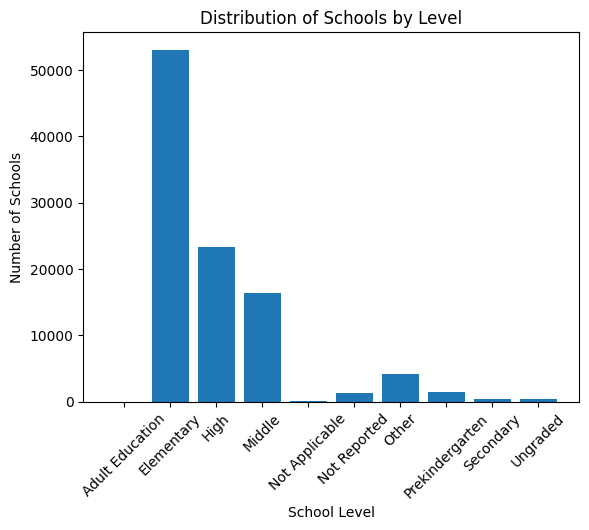

2023-06-14 15:38:31,565 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-14 15:38:31,565 INFO sqlalchemy.engine.Engine SELECT COUNT(*) AS Virtual_Schools FROM Public_School_Characteristics_2020_2021 WHERE VIRTUAL = 'Yes';
2023-06-14 15:38:31,566 INFO sqlalchemy.engine.Engine [generated in 0.00107s] ()
2023-06-14 15:38:31,582 INFO sqlalchemy.engine.Engine ROLLBACK


[(0,)]

In [20]:
import matplotlib.pyplot as plt

with temp_db_public_school_characteristics_2020_2021.connect() as conn:
    query = "SELECT SCHOOL_LEVEL, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY SCHOOL_LEVEL;"
    df3 = pd.read_sql_query(query, conn)

# Now, df is a pandas dataframe containing the result of the SQL query.
# Let's plot a bar graph using matplotlib:

plt.bar(df3['SCHOOL_LEVEL'], df3['Number_of_Schools'])
plt.xlabel('School Level')
plt.ylabel('Number of Schools')
plt.title('Distribution of Schools by Level')
plt.xticks(rotation=45)  # Rotates X-axis labels to avoid overlap
plt.show()



with temp_db_public_school_characteristics_2020_2021.connect() as conn:
        # Total Number of Schools [(100722,)]
    # result = conn.execute(text("SELECT COUNT(*) AS Total_Schools FROM Public_School_Characteristics_2020_2021;")) 
        # Total Student Enrollment [(49422273.0,)]
    # result = conn.execute(text("SELECT SUM(TOTAL) AS Total_Enrollment FROM Public_School_Characteristics_2020_2021;")) 
        # School Distribution by School Level
        # [('Adult Education', 21),
        #  ('Elementary', 53024),
        #  ('High', 23295),
        #  ('Middle', 16357),
        #  ('Not Applicable', 158),
        #  ('Not Reported', 1355),
        #  ('Other', 4147),
        #  ('Prekindergarten', 1526),
        #  ('Secondary', 470),
        #  ('Ungraded', 369)]
    # result = conn.execute(text("SELECT SCHOOL_LEVEL, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY SCHOOL_LEVEL;")) 
    # result = conn.execute(text("SELECT SCHOOL_LEVEL, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY SCHOOL_LEVEL;")) 
    # Title I Schools Count
    # result = conn.execute(text("SELECT COUNT(*) AS Title_I_Schools FROM Public_School_Characteristics_2020_2021 WHERE TITLEI = TRUE")) 
    # Number of Charter Schools
    # result = conn.execute(text("SELECT COUNT(*) AS Charter_Schools FROM Public_School_Characteristics_2020_2021 WHERE CHARTER_TEXT = '1-Yes';")) 
    
    # Number of Magnet Schools  [(3063,)]
    # This query will provide the number of magnet schools, which are public schools with specialized courses or curricula.
    # result = conn.execute(text("SELECT COUNT(*) AS Magnet_Schools FROM Public_School_Characteristics_2020_2021 WHERE MAGNET_TEXT = 'Yes';"))

    # Number of Virtual Schools
    # This query will provide the number of virtual (online) schools.
    result = conn.execute(text("SELECT COUNT(*) AS Virtual_Schools FROM Public_School_Characteristics_2020_2021 WHERE VIRTUAL = 'Yes';"))

    # Schools by Locale
    # This query will provide the distribution of schools by locale.
    # result = conn.execute(text("SELECT ULOCALE, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY ULOCALE;"))

    # Average Student-Teacher Ratio
    # This query will provide the average student-teacher ratio.
    # result = conn.execute(text("SELECT AVG(STUTERATIO) AS Avg_Student_Teacher_Ratio FROM Public_School_Characteristics_2020_2021;"))

    # Total Number of Free Lunch Students
    # This query will provide the total number of students who receive free lunch, an indicator of low socioeconomic status.
    # result = conn.execute(text("SELECT SUM(TOTFRL) AS Total_Free_Lunch_Students FROM Public_School;"))

    # Student Enrollment by Grade
    # This query will provide student enrollment numbers by grade.
    # result = conn.execute(text("SELECT SUM(PK) AS PK_Enrollment, SUM(KG) AS KG_Enrollment, SUM(G01) AS G01_Enrollment, ..., SUM(G13) AS G13_Enrollment FROM Public_School_Characteristics_2020_2021;"))

    # Number of Active Schools
    # This query will provide the number of currently active schools.
    # result = conn.execute(text("SELECT COUNT(*) AS Active_Schools FROM Public_School_Characteristics_2020_2021 WHERE SY_STATUS_TEXT = 'Active';"))

    # Number of Closed Schools
    # This query will provide the number of schools that are currently closed.
    # result = conn.execute(text("SELECT COUNT(*) AS Closed_Schools FROM Public_School_Characteristics_2020_2021 WHERE SY_STATUS_TEXT = 'Closed';"))

    # Schools by County
    # result = conn.execute(text("SELECT NMCNTY, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021"))

    # Schools by County
    # This query will provide the distribution of schools by county.
    # result = conn.execute(text("SELECT NMCNTY, COUNT(*) AS Number_of_Schools FROM Public_School GROUP BY NMCNTY;"))

    # Average Enrollment by School Level
    # This query will provide the average student enrollment numbers by school level.
    # result = conn.execute(text("SELECT SCHOOL_LEVEL, AVG(TOTAL) AS Average_Enrollment FROM Public_School GROUP BY SCHOOL_LEVEL;"))

    # Schools by School Type
    # This query will provide the distribution of schools by type.
    # result = conn.execute(text("SELECT SCHOOL_TYPE_TEXT, COUNT(*) AS Number_of_Schools FROM Public_School GROUP BY SCHOOL_TYPE_TEXT;"))

    # Student Ethnic Distribution
    # This query will provide the distribution of students by ethnicity.
    # result = conn.execute(text("SELECT SUM(AM) AS American_Indian, SUM(AS) AS Asian, SUM(BL) AS Black, SUM(HP) AS Pacific_Islander, SUM(HI) AS Hispanic, SUM(TR) AS Two_or_More_Races, SUM(WH) AS White FROM Public_School;"))

    # Number of Schools by State
    # This query will provide the distribution of schools by state.
    # result = conn.execute(text("SELECT STABR, COUNT(*) AS Number_of_Schools FROM Public_School GROUP BY STABR;"))

    # Top 10 Largest Schools by Enrollment
    # This query will provide the 10 largest schools by student enrollment.
    # result = conn.execute(text("SELECT SCH_NAME, TOTAL FROM Public_School ORDER BY TOTAL DESC LIMIT 10;"))

    # Number of Reduced Lunch Students
    # This query will provide the total number of students who receive reduced-price lunch.
    # result = conn.execute(text("SELECT SUM(REDLCH) AS Reduced_Lunch_Students FROM Public_School;"))

result.all()
# result2.all()

In [21]:
import pandas as pd

queries = {
    "total_schools": "SELECT COUNT(*) AS Total_Schools FROM Public_School_Characteristics_2020_2021;",
    "total_enrollment": "SELECT SUM(TOTAL) AS Total_Enrollment FROM Public_School_Characteristics_2020_2021;",
    "school_distribution": "SELECT SCHOOL_LEVEL, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY SCHOOL_LEVEL;",
    "title_I_schools": "SELECT COUNT(*) AS Title_I_Schools FROM Public_School_Characteristics_2020_2021 WHERE TITLEI = TRUE",
    "charter_schools": "SELECT COUNT(*) AS Charter_Schools FROM Public_School_Characteristics_2020_2021 WHERE CHARTER_TEXT = '1-Yes';",
    "magnet_schools": "SELECT COUNT(*) AS Magnet_Schools FROM Public_School_Characteristics_2020_2021 WHERE MAGNET_TEXT = 'Yes';",
    "virtual_schools": "SELECT COUNT(*) AS Virtual_Schools FROM Public_School_Characteristics_2020_2021 WHERE VIRTUAL = 'Yes';",
    "school_locale": "SELECT ULOCALE, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY ULOCALE;",
    "avg_student_teacher_ratio": "SELECT AVG(STUTERATIO) AS Avg_Student_Teacher_Ratio FROM Public_School_Characteristics_2020_2021;",
    "total_free_lunch_students": "SELECT SUM(TOTFRL) AS Total_Free_Lunch_Students FROM Public_School_Characteristics_2020_2021;",
    "active_schools": "SELECT COUNT(*) AS Active_Schools FROM Public_School_Characteristics_2020_2021 WHERE SY_STATUS_TEXT = 'Active';",
    "closed_schools": "SELECT COUNT(*) AS Closed_Schools FROM Public_School_Characteristics_2020_2021 WHERE SY_STATUS_TEXT = 'Closed';",
    "schools_by_county": "SELECT NMCNTY, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021",
    "schools_by_county_group_by_nmcnty": "SELECT NMCNTY, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY NMCNTY;",
    "average_enrollment_by_school_level": "SELECT SCHOOL_LEVEL, AVG(TOTAL) AS Average_Enrollment FROM Public_School_Characteristics_2020_2021 GROUP BY SCHOOL_LEVEL;",
    "schools_by_school_type": "SELECT SCHOOL_TYPE_TEXT, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY SCHOOL_TYPE_TEXT;",
    "schools_race_distribution": "SELECT SUM(AM) AS American_Indian, SUM(BL) AS Black, SUM(HP) AS Pacific_Islander, SUM(HI) AS Hispanic, SUM(TR) AS Two_or_More_Races, SUM(WH) AS White FROM Public_School_Characteristics_2020_2021;",
    "schools_by_state_group_by_stabr": "SELECT STABR, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY STABR;",
    "schools_by_state_group_by_stabr": "SELECT STABR, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY STABR;",
    "top_10_largest_schools_by_enrollment": "SELECT SCH_NAME, TOTAL FROM Public_School_Characteristics_2020_2021 ORDER BY TOTAL DESC LIMIT 10;",
    "number_of_reduced_lunch_students": "SELECT SUM(REDLCH) AS Reduced_Lunch_Students FROM Public_School_Characteristics_2020_2021;",
}

results = {}

with temp_db_public_school_characteristics_2020_2021.connect() as conn:
    for query_name, query in queries.items():
        result = pd.read_sql_query(query, conn)
        results[query_name] = result

# Now you can access the result of each query like this:
print(results["total_schools"])
print(results["total_enrollment"])
print(results["school_distribution"])
print(results["title_I_schools"])
print(results["charter_schools"])
print(results["magnet_schools"])
print(results["virtual_schools"])
print(results["school_locale"])
print(results["avg_student_teacher_ratio"])
print(results["total_free_lunch_students"])
print(results["active_schools"])
print(results["closed_schools"])
print(results["schools_by_county"])
print(results["schools_by_county_group_by_nmcnty"])
print(results["average_enrollment_by_school_level"])
print(results["schools_by_school_type"])
print(results["schools_race_distribution"])
print(results["schools_by_state_group_by_stabr"])
print(results["top_10_largest_schools_by_enrollment"])
print(results["number_of_reduced_lunch_students"])




2023-06-14 15:38:31,596 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-14 15:38:31,597 INFO sqlalchemy.engine.Engine SELECT COUNT(*) AS Total_Schools FROM Public_School_Characteristics_2020_2021;
2023-06-14 15:38:31,598 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-14 15:38:31,599 INFO sqlalchemy.engine.Engine SELECT SUM(TOTAL) AS Total_Enrollment FROM Public_School_Characteristics_2020_2021;
2023-06-14 15:38:31,600 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-14 15:38:31,625 INFO sqlalchemy.engine.Engine SELECT SCHOOL_LEVEL, COUNT(*) AS Number_of_Schools FROM Public_School_Characteristics_2020_2021 GROUP BY SCHOOL_LEVEL;
2023-06-14 15:38:31,629 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-14 15:38:31,700 INFO sqlalchemy.engine.Engine SELECT COUNT(*) AS Title_I_Schools FROM Public_School_Characteristics_2020_2021 WHERE TITLEI = TRUE
2023-06-14 15:38:31,700 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-14 15:38:31,719 INFO sqlalchemy.engine.Engine SELECT CO

In [22]:
# create a function that sets up the first part of the prompt for us
### sqlite SQL tables, with their properties:

# Employee (id, name, department_id)
# Department (id, name, address)
# Salary_Payments(id, employee_id, amount, date)
#
### A query to list the names of the departments which employed more than 10
# SELECT

def create_table_definition(df):
  prompt = """### sqlite SQL table, with it properties:
  #
  # Sales({})
  #
  """.format(",".join(str(col) for col in df.columns))

  return prompt

In [23]:
[str(col) for col in df.columns]

['ORDERNUMBER',
 'QUANTITYORDERED',
 'PRICEEACH',
 'ORDERLINENUMBER',
 'SALES',
 'ORDERDATE',
 'STATUS',
 'QTR_ID',
 'MONTH_ID',
 'YEAR_ID',
 'PRODUCTLINE',
 'MSRP',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'ADDRESSLINE2',
 'CITY',
 'STATE',
 'POSTALCODE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

In [24]:
",".join(str(col) for col in df.columns)

'ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE'

In [25]:
print(create_table_definition(df))

### sqlite SQL table, with it properties:
  #
  # Sales(ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE)
  #
  


In [26]:
def prompt_input():
    nlp_text =  input("Enter your query: ") 
    print("Enter your query: ")
    return nlp_text


In [27]:
prompt_input()

Enter your query: 


' total sales per quarter'

In [28]:
def combine_prompts(df,query_prompt):
    definition = create_table_definition(df)
    query_init_string = f"### A query to answer: {query_prompt}\nSELECT"

    return definition + query_init_string   

In [29]:
nlp_text = prompt_input() # grabbing natural language input from user
combine_prompts(df,nlp_text) # combining prompts: DF + query that does ___ + NLP input

Enter your query: 


'### sqlite SQL table, with it properties:\n  #\n  # Sales(ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE)\n  #\n  ### A query to answer:  total sales per quarter\nSELECT'